## Kalman filter

In [42]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os.path as osp
import sys
#sys.path.insert(0, '/usr/users/vogg/FairMOT/src')
#sys.path.insert(0, '/usr/users/vogg/FairMOT/src/lib')
#sys.path.insert(0, '/opt/conda/envs/FairMOT/lib/python3.8/site-packages')
#sys.path.insert(0, '/usr/users/vogg/FairMOT/DCNv2')
#sys.path

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from tracking_utils.kalman_filter import KalmanFilter
from tracker import matching
from tracker.basetrack import BaseTrack, TrackState
from tracker.multitracker import STrack

In [44]:
kf = KalmanFilter()

In [114]:
mean, cov = kf.initiate([200, 300, 0.82, 50])
plot_list = []

new_mean, new_cov = kf.predict(mean, cov)
final_mean, final_cov = kf.update(new_mean, new_cov, [205, 310, 0.8, 55])
new_mean, new_cov = kf.predict(final_mean, final_cov)
    
new_mean

array([     205.37,      310.74,     0.81961,      55.372,      1.0331,      2.0661, -1.9608e-10,      1.0331])

In [105]:
cov

array([[       2500,           0,           0,           0,           0,           0,           0,           0],
       [          0,        2500,           0,           0,           0,           0,           0,           0],
       [          0,           0,      0.0001,           0,           0,           0,           0,           0],
       [          0,           0,           0,        2500,           0,           0,           0,           0],
       [          0,           0,           0,           0,      976.56,           0,           0,           0],
       [          0,           0,           0,           0,           0,      976.56,           0,           0],
       [          0,           0,           0,           0,           0,           0,       1e-10,           0],
       [          0,           0,           0,           0,           0,           0,           0,      976.56]])

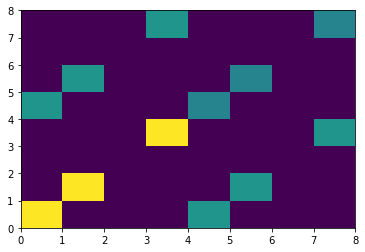

In [106]:
surf = plt.pcolormesh(new_cov)

In [107]:
mu = new_mean[:2]
Sigma = new_cov[:2,:2]

In [117]:
N = 6000
X = np.linspace(0, 1980, 1980)
Y = np.linspace(0, 1088, 1088)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

In [118]:
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N


In [119]:
Z = multivariate_gaussian(pos, mu, Sigma)
Sigma_det = np.linalg.det(Sigma)
Sigma_inv = np.linalg.inv(Sigma)
N = np.sqrt((2*np.pi)**2 * Sigma_det)

fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

np.exp(-fac / 2) / N

array([[ 5.5799e-22,  6.2731e-22,  7.0485e-22, ...,           0,           0,           0],
       [ 6.6631e-22,  7.4909e-22,  8.4168e-22, ...,           0,           0,           0],
       [  7.952e-22,  8.9399e-22,  1.0045e-21, ...,           0,           0,           0],
       ...,
       [ 1.4567e-84,  1.6376e-84,    1.84e-84, ...,           0,           0,           0],
       [ 9.3475e-85,  1.0509e-84,  1.1808e-84, ...,           0,           0,           0],
       [  5.995e-85,  6.7398e-85,  7.5729e-85, ...,           0,           0,           0]])

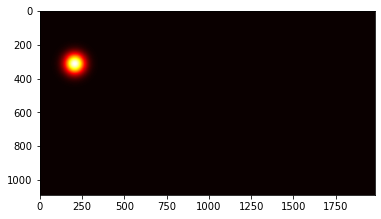

9.092103573316494e-05

In [132]:
plt.imshow(Z, cmap='hot', interpolation='nearest')
plt.show()

np.max(Z)

In [128]:
torch.from_numpy(np.ones((5,5)))

NameError: name 'torch' is not defined